In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine)
Base.prepare(autoload_with=engine)

C:\Users\hanyd\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.measurement, and will be replaced in the string-lookup table.
  """
C:\Users\hanyd\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.station, and will be replaced in the string-lookup table.
  """


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table to a variable called `Station` & 'Measurement'
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [9]:
# Query head Records in the Table
station_data = pd.read_sql("SELECT * FROM station", conn)

In [10]:
# Display the station_data DataFrame. 
station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [11]:
# Query head Records in the Table
measurement_data = pd.read_sql("SELECT * FROM measurement ", conn)

In [12]:
# Display the measurement_data DataFrame. 
measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


# Inspector

In [13]:
# Get the table names using `inspect()`.
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [14]:
# Get a 'measurement' list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
# Get a 'station' list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])  

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [16]:
# result = engine.execute("select *  from measurement").fetchall()
# print(result)


In [17]:
# Find the most recent date in the data set.

recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Recent Date: {recent_date}")

Recent Date: ('2017-08-23',)


In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
for date in query_date :
    latest_date= pd.to_datetime(date)

In [19]:
# Calculate the date one year from the last date in data set.
year_from_recent = dt.date(latest_date.year-1,latest_date.month,latest_date.day)
year_from_recent

datetime.date(2016, 8, 23)

In [20]:
# Perform a query to retrieve the data and precipitation scores
one_year = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= year_from_recent).all()
one_year

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [21]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation = pd.DataFrame(one_year, columns=['Date', 'Precipitation'])
precipitation = precipitation.sort_values(["Date"], ascending=True)
precipitation

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


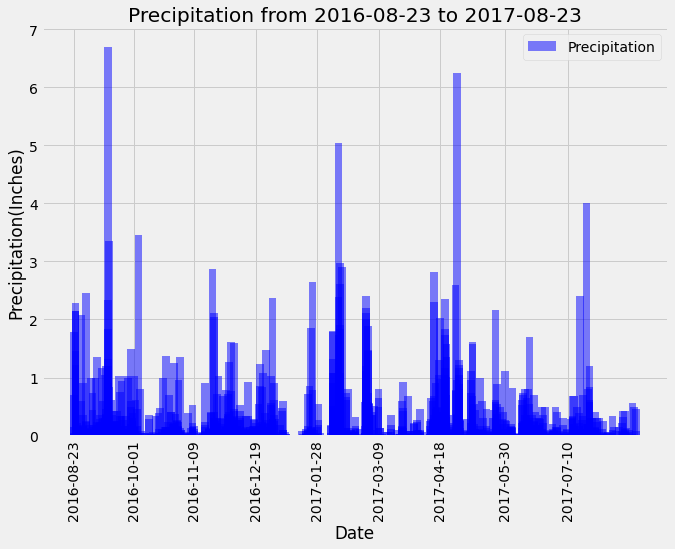

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data (Date major ticks # based on canvas module10 sample)
x = precipitation['Date']
y = precipitation['Precipitation']

plt.figure(figsize=(10,7))
plt.bar(x,y,width = 5 ,color='b', alpha=0.5, align="center",label='Precipitation')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

#major_ticks = (0,78,158,238,321)                      # based on starter code sample
major_ticks = (0,39,78,118,158,198,238,280,321)        # based on canvas module10 sample
plt.xticks(major_ticks,rotation=90)

plt.title(f"Precipitation from {year_from_recent} to {recent_date[0]}")
plt.xlabel("Date")
plt.ylabel("Precipitation(Inches)")
plt.grid(which='major', axis='both', linestyle='-')
plt.legend(loc="best")

plt.savefig("Saved_Output_Figures/Precipitation.png")
plt.show()


In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [25]:
session.query(func.count(Station.id)).all()

[(9,)]

In [26]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Mesur = [Measurement.station,func.count(Measurement.id)]
active_stations = session.query(*Mesur).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
active_stations

# for row in Mes:
#     print(row)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Active_id = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
most_active_stations = session.query(*Active_id).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
most_active_stations

(54.0, 85.0, 71.66378066378067)

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_results = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == active_stations[0][0]).\
                filter(Measurement.date >= year_from_recent).all()
tobs = pd.DataFrame(temp_results)
tobs = pd.DataFrame(temp_results, columns=['Station', 'Tobs'])
tobs.head()

,Station,Tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


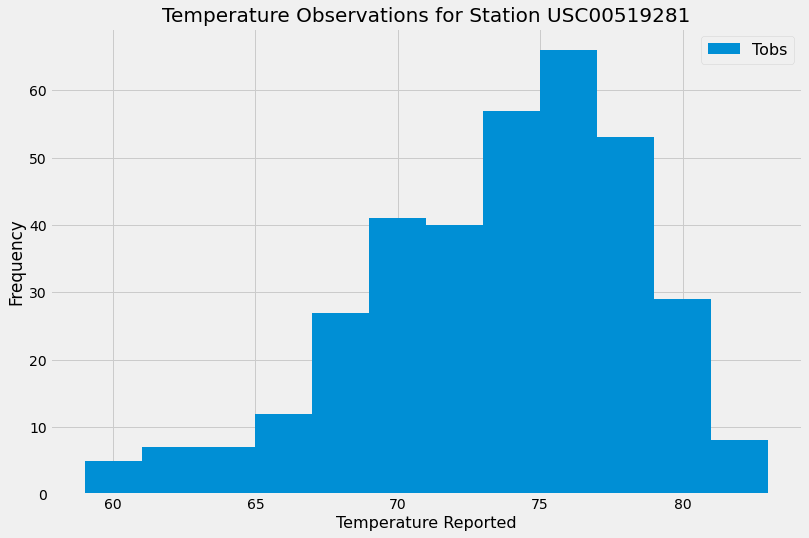

In [32]:
# Use Pandas histogram with Matplotlib to plot the data
tobs.plot.hist(by='Station', bins=12, figsize=(12,8))
plt.grid()
plt.title(f"Temperature Observations for Station {active_stations[0][0]}", fontsize=20)
plt.xlabel("Temperature Reported", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.grid(which='major', axis='both', linestyle='-')
plt.savefig("Saved_Output_Figures/StationTemps.png")
plt.show()

# Close Session

In [30]:
# Close Session
session.close()